In [1]:
# Import libraries
import time
import numpy as np
from numpy import linalg as LA

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

## MA934

## Solving (differential) equations

### Root-finding in 1D

Task: find $x$ such that $f(x) = 0$.

Interval $[a_0,b_0]$ brackets a root of $f(x)$ if $f(a_0)\,f(b_0) <0$.

Bracket and bisect method:

1 $c_n = \frac{1}{2}(a_n+b_n)$  
2 If $f(a_n)\,f(c_n) <0$, $[a_{n+1}, b_{n+1}] = [a_n, c_n]$. Otherwise  $[a_{n+1}, b_{n+1}] = [c_n, b_n]$  
3  Repeat until $\epsilon_n = b_n-a_n < \epsilon_\text{tol}$.

Convergence: $\epsilon_n \sim 2^{-n}$.

### Root-finding in 1D: Newton-Raphson iteration

Suppose root is at $x=x^*$ and current estimate is $x_n$.

Write $x_{n+1} = x_n+\delta_n$ and try to choose $\delta_n$ such that
$f(x_{n+1}) = 0$:

Taylor expand:
$$
0 = f(x_{n+1}) = f(x_n + \delta_n) = f(x_n) + \delta_n\,f^\prime(x_n) + \mathcal{O}(\delta_n^2) 
$$
Assuming we are near the root, we neglect the $\mathcal{O}(\delta_n^2)$ terms and solve for $\delta_n$: 
$$
\delta_n = -\frac{f(x_n)}{f^\prime(x_n)}.
$$
This gives the Newton-Raphson iterative method:
$$
x_{n+1} = x_n  -\frac{f(x_n)}{f^\prime(x_n)}.
$$

### Convergence properties of Newton-Raphson

Geometrical interpretation:

<img src="files/images/Newton-Raphson.jpg" alt="NR" style="width: 400px;"/>  

NR is not guaranteed to converge:



<img src="files/images/Newton-RaphsonFailure1.jpg" alt="NR" style="width: 400px;"/>  



<img src="files/images/Newton-RaphsonFailure2.jpg" alt="NR" style="width: 400px;"/>  

### Super-exponential convergence  of Newton-Raphson

When NR does converge, it converges super-exponentially.

Let  $\epsilon_n = x_n - x_*$.  Then NR formula gives:
$$
\epsilon_{n+1} = \epsilon_n - \frac{f(x^*+\epsilon_n)}{f^\prime(x^*+\epsilon_n)}.
$$
Taylor expanding and using $f(x^*)=0$ one obtains (check):

$$
\begin{align*}
f(x^*+\epsilon_n) &= \epsilon_n\, f^\prime(x_*)\,\left( 1+ \frac{\epsilon_n}{2}\frac{f^{\prime\prime}(x_*)}{f^\prime(x_*)} \right) + O(\epsilon_n^3),\\
f^\prime(x^*+\epsilon_n) &=  f^\prime(x_*)\, \left( 1+ \epsilon_n \frac{f^{\prime\prime}(x_*)}{f^\prime(x_*)} \right) + O(\epsilon_n^2).
\end{align*}
$$

### Super-exponential convergence of Newton-Raphson

Keeping only the leading order terms on the RHS, there is a cancellation at $\mathcal{O}(\epsilon_n)$ and we get
$$
 \epsilon_{n+1} = \alpha\,\epsilon _n^2.
$$
where $\alpha =  \frac{f^{\prime\prime}(x_*)}{2\,f^\prime(x_*)}$ depends on the properties of $f$ at the root, $x^*$.

This nonlinear recursion relation can be linearised by $a_n = \log_\alpha \epsilon_n$ to give:
$$
a_{n+1} = 2\,a_n+1
$$
Solution is $a_n = c_0\,2^{n-1}-1$ where $c_0$ is a constant.  
In original variables, choosing $c_0$ to match the initial condition, $\epsilon_0$, we get
$$
\epsilon_n = \epsilon_0\,\left|\alpha \right|^{-1}\,\left|\alpha \right|^{2^n}.
$$


### Newton-Raphson in $\mathbb{R}^n$

System of $n$ equations in $\mathbb{R}^n$:
$$
\begin{align*}
F_1(x_1\ldots x_n) &= 0 \\
\vdots\hspace{1.0cm}  & \ \  \vdots\\
F_n(x_1\ldots x_n) &= 0. 
\end{align*}
$$
or 
$$
\mathbf{F}(\mathbf{x}) = 0.
$$

As before, write $\mathbf{x}_{n+1}=\mathbf{x}_n+\boldsymbol{\delta}_n$ and try to choose  $\boldsymbol{\delta}_n$  such that  $\mathbf{F}(\mathbf{x}_{n+1})=0$.

Taylor expand:

$$
\begin{align*}
0 &= \mathbf{F}(\mathbf{x}_{n+1}) = \mathbf{F}(\mathbf{x}_n + \boldsymbol{\delta}_n)\\
&= \mathbf{F}(\mathbf{x}_n) + \mathbf{J}(\mathbf{x}_n)\,\boldsymbol{\delta}_n + \mathcal{O}(\left|\boldsymbol{\delta}\right|_n^2) 
\end{align*},
$$

where $\mathbf{J}(\mathbf{x}_n)$ is the Jacobian matrix

$$
\mathbf{J}_{i\,j} = \frac{\partial F_i}{\partial x_j}(\mathbf{x}_n).
$$

Neglecting the $\mathcal{O}(\left|\boldsymbol{\delta}_n\right|^2)$ terms, we  obtain $\boldsymbol{\delta}_n$ from a linear solve:

$$
\boldsymbol{\delta}_n = - \mathbf{J}(\mathbf{x}_n)\,\backslash  \, \mathbf{F}(\mathbf{x}_n)
$$


### Example: Newton-Raphson iteration in $\mathbb{C}$.

For complex valued functions of a complex variable:
$$
z_{n+1} = z_n - \frac{f(z_n)}{f^\prime(z_n)}
$$

Nonlinear iterated map which can lead to very rich dynamics (periodic cycles, chaos, intermittency etc). 

Example: compute basins of attraction in $\mathbb{C}$  of the roots of the polynomial
$$
f(z) = z^3-1 =0.
$$
under NR iteration.

<img src="files/images/newton-fractal.png" alt="NR" style="width: 400px;"/>  

### Ordinary differential equations

For initial value problems, it is generally sufficient to develop algorithms to solve autonomous first order systems in $\mathbb{R}^n$: 
$$
\frac{d \mathbf{u}}{d t}=  \mathbf{F}(\mathbf{u}) \hspace{0.5cm}\text{with }\hspace{0.5cm} \mathbf{u}(0) = \mathbf{U}_0.
$$
For example, the second order non-autonomous equation,
$$
\frac{d^2 y}{d t^2} + 2 \nu \omega \frac{d y}{d t} + \omega^2 y = F(t),
$$
is equivalent (check) to this 3-dimensional autonomous system:
$$
\frac{d }{d t} \left(
\begin{array}{c}
u^{(1)}\\ 
u^{(2)}\\ 
u^{(3)} 
\end{array}
\right)
= 
\left(
\begin{array}{c}
-2 \nu \omega u^{(1)} - \omega^2 u^{(2)} + F(u^{(3)})\\ 
u^{(1)}\\ 
1 
\end{array}
\right)
\hspace{0.5cm}\text{where }\hspace{0.5cm} \left(
\begin{array}{c}
u^{(1)}\\ 
u^{(2)}\\ 
u^{(3)} 
\end{array}
\right) = \left(
\begin{array}{c}
\frac{d y}{d t}\\ 
y\\ 
t 
\end{array}
\right).
$$

### Discretisation and time stepping

**Discretisation**: approximate continuous $\mathbf{u}(t)$ on $t\in [0,T]$ by
$\{\mathbf{u}_i\ :\ i=0\ldots N\}$. Here 

$$
\begin{align*}
\mathbf{u}_i &= \mathbf{u}(t_i)\\
t_i &=i\,h,
\end{align*}
$$

and the "time step" is

$$
h=\frac{T}{N}.
$$

If $h$ is "small" then

$$
\frac{d \mathbf{u}}{d t}=  \mathbf{F}(\mathbf{u}) \hspace{0.5cm}\text{with }\hspace{0.5cm} \mathbf{u}(0) = \mathbf{U}_0.
$$

can be hueristically approximated by

$$
\frac{\mathbf{u}_{i+1}-\mathbf{u}_i}{h} = \mathbf{F}(\mathbf{u}_i)
\hspace{0.25cm}\text{with }\hspace{0.25cm} \mathbf{u}_0 = \mathbf{U}_0.
$$

Re-arranging, we get the (Forward Euler) time-stepping algorithm

$$
\mathbf{u}_{i+1} = \mathbf{u}_i + h\,\mathbf{F}_i \hspace{0.25cm}\text{with }\hspace{0.25cm} \mathbf{u}_0 = \mathbf{U}_0,
$$

where $\mathbf{F}_i$ means $\mathbf{F}(\mathbf{u}_i)$. 

### Taylor's theorem


If $f(x)$ is a real-valued function which is differentiable $n+1$ times on the interval $[x, x+h]$ then there exists a point, $\xi$, in $[x, x+h]$ such that
$$
f(x+h) = f(x) + \frac{1}{1!}\, h \, \frac{d f}{d x}(x) + \frac{1}{2!}\, h^2 \, \frac{d^2f}{d x^2}(x) + \ldots\\
+ \frac{1}{n!}\, h^n \, \frac{d^nf}{d x^n}(x) + h^{n+1} R_{n+1}(\xi)
$$
where
$$
R_{n+1}(\xi) = \frac{1}{(n+1)!} \, \frac{d^{n+1} f}{d x^{n+1}}(\xi).
$$
Useful for systematic analysis of discrete approximations to derivatives and ODEs.

### Finite difference approximations of derivatives

Approximate $f^\prime(x)$ by linear combinations of values of $f$ at nearby points.  
Taylor with $n=1$:
$$
f(x+h) = f(x) + h \, f^\prime(x) + \mathcal{O}(h^2).
$$
Using same discrete notation as before, rearrange to get:
$$
f^\prime(x_i) = \frac{f_{i+1} - f_i}{h} +\mathcal{O}(h). \hspace{1.0cm}\text{Forward difference formula.}
$$
Could also have started from $f(x-h)$ to obtain:
$$
f^\prime(x_i) = \frac{f_{i} - f_{i-1}}{h} +\mathcal{O}(h). \hspace{1.0cm}\text{Backwards difference formula.}
$$
In both cases, the approximation error is $\mathcal{O}(h)$.

### Higher order finite differences: improving the error

Improved accuracy can be obtained by linearly combining more points:

$$
\begin{align*}
f_{i+1} &= f_i + h\,f^\prime(x_i) +  \frac{1}{2}\, h^2 \, f^{\prime\prime}(x_i) + \mathcal{O}(h^3)\\
f_{i-1} &= f_i - h\,f^\prime(x_i) +  \frac{1}{2}\, h^2 \, f^{\prime\prime}(x_i) + \mathcal{O}(h^3).
\end{align*}
$$

Take the linear combination $a_1\,f_{i-1} +a_2\,f_i +a_3\,f_{i+1}$:

$$
a_1\,f_{i-1} +a_2\,f_i +a_3\,f_{i+1} = (a_1+a_2+a_3)\,f_i + (a_3-a_1)\,h\,f^\prime(x_i)\\
+ \frac{1}{2}\,(a_3+a_1)\, h^2 \, f^{\prime\prime}(x_i) + O(h^3).
$$
We want to choose the $a$'s to cancel the terms proportional to $h^0$ and $h^2$.

### Higher order finite differences: improving the error

$a_1$, $a_2$ and $a_3$ should therefore satisfy the equations

$$
\begin{align*}
a_1+a_2+a_3 &=0\\
a_3-a_1 &= 1\\
a_3+a_1 &=0.
\end{align*}
$$

We get $a_1=-\frac{1}{2}$, $a_2=0$ and $a_3 = \frac{1}{2}$.

Rearranging to get an expression for $f^\prime(x_i)$:
$$
f^\prime(x_i) = \frac{f_{i+1} - f_{i-1}}{2\,h} + O(h^2).  \hspace{1.0cm}\text{Centred difference formula.}
$$


### Higher order finite differences: improving the error

The set of points underpinning a finite-difference approximation is known as the "stencil". 

A 5-point stencil leads to a 4th order accurate finite difference formula for $f^\prime(x_i)$:

$$
\frac{-f_{i+2}\!+\!8 f_{i+1}\! - \!8 f_{i-1}\!+\!f_{i-2}}{12\,h}\! +\! O(h^4).
$$


<img src="files/images/finiteDifferences.jpg" alt="FD" style="width: 400px;"/> 

Error as a function of $h$ for several finite difference approximations to the derivative of $f(x) = \sqrt{x}$ at $x=2$


### Euler method again

Return to the ODE (assumed scalar from now on)
$$
\frac{d u}{d t}=  F(u) \hspace{0.5cm}\text{with }\hspace{0.5cm} u(0) = U_0.
$$
Accounting for the error in the forward difference approximation,

$$
\frac{u_{i+1}-u_i}{h} +\mathcal{O}(h) = F(u_i)
\hspace{0.25cm}\text{with }\hspace{0.25cm} u_0 = U_0.
$$

The Forward Euler time-stepping algorithm thus has *step-wise error* $\mathcal{O}(h^2)$:

$$
u_{i+1} = u_i + h\,F_i  +\mathcal{O}(h^2)\hspace{0.25cm}\text{with }\hspace{0.25cm} \mathbf{u}_0 = \mathbf{U}_0,
$$

*Global error* is $\mathcal{O}(N h^2) = T\,\mathcal{O}(h)$ since $h=\frac{T}{N}$.


### Implicit methods: Backward Euler

We could equally have used the backward difference approximation:

$$
\frac{u_{i}-u_{i-1}}{h} +\mathcal{O}(h) = F(u_i)
\hspace{0.25cm}\text{with }\hspace{0.25cm} u_0 = U_0.
$$

which gives (with $i \to i+1$)

$$
u_{i+1} = u_i + h\, F_{i+1} + O(h^2).
$$

This is called the Backward Euler method. Note $u_{i+1}$ appears on both sides. 

This is an example of an *implicit* method. Implicit methods require a Newton-Raphson solve at each timestep.


### Improving accuracy: trapezoidal method

Another way to think about time-stepping algorithms is via approximation of
$$
u(t+h) = u(t) + \int_t^{t+h} \!\!\!\!F(u(\tau))\,d\tau.
$$

Approximation of integral with left and right Riemann rule gives the forward and backward Euler methods respectively (check).

If we use the Trapezoidal rule we get:

$$
u_{i+1} = u_i + \frac{h}{2}\left[F_i + F_{i+1} \right].
$$
This is called the implicit trapezoidal method.

The implicit trapezoidal method improves on the Euler methods because it has a stepwise error of $\mathcal{O}(h^3)$. How to show this?

### Error analysis of timestepping rules

Consider Taylor expansion of $u_{i+1}$:
$$
u_{i+1} = u_i + h \frac{d u}{d t}(t_i) + \frac{h^2}{2}\frac{d^2 u}{d t^2}(t_i) + O(h^3)\\
= u_i + h F_i +\frac{1}{2} h^2 F_i\, F^\prime_i +  O(h^3)
$$
Note the use of the chain rule:
$$
\frac{d^2 u}{d t^2}(t_i) = \left.\frac{d }{d t}F(u(t))\right|_{t=t_i} = \left. F^\prime(u(t))\,\frac{d u}{d t}\right|_{t=t_i}\\
= \left. F^\prime(u(t))\,F(u(t))\right|_{t=t_i} = F^\prime_i\,F_i.
$$

### Error analysis of timestepping rules

Idea: Taylor expand RHS of timestepping rule and identify the first order at which expansion differs from the above.

$$
\begin{align*}
F(u(t_{i+1})) &= F(u_i + h F_i + \mathcal{O}(h^2))\\
&= F(u_i) + (h F_i) \frac{d F}{d u}(u(t_i)) + O(h^2)\\
&=F_i + h F_i F_i^\prime + O(h^2).
\end{align*}
$$
RHS of implicit trapezoidal method is therefore
$$
u_i + \frac{h}{2}\left[F_i + F_{i+1}\right] =  u_i + h F_i +\frac{1}{2} h^2 F_i\, F^\prime_i +  \mathcal{O}(h^3)
$$
Comparing with $u_{i+1}$, stepwise error is $\mathcal{O}(h^3)$.

### Predictor-corrector methods

Can we get higher order accuracy with an explicit scheme?

**Predictor-corrector** idea: use a less accurate explicit method to predict $u_{i+1}$ and then use the higher order formula to correct this prediction.

Example: improved Euler method:

1. Use forward Euler as predictor:
$$
u^*_{i+1} = u_i + h F_i,
$$
and calculate
$$
F^*_{i+1} = F(u^*_{i+1}).
$$
2. Use the Trapezoidal Method to correct this :
$$
u_{i+1} = u_i + \frac{h}{2}\left[F_i + F^*_{i+1} \right].
$$

Error analysis (similar to above - check) shows stepwise error is $\mathcal{O}(h^3)$.

### Choosing the timestep

In practice we need to operate at a finite value of $h$. How do we choose it? 

Measure the error by comparing the numerical solution at a grid point, $\widetilde{u}_i$, to the exact solution, $u(t_i)$. 

Two tolerance criteria are commonly used:
$$
\begin{align*}
&E_a(h) = \left| \widetilde{u}_i - u_i \right| \leq \epsilon &  \text{Absolute error threshold,}\\
&E_r(h) = \frac{\left| \widetilde{u}_i - u_i \right|}{\left| u_i\right|} \leq \epsilon &  \text{Relative error threshold.}
\end{align*}
$$
Fixing error tolerance allows us to take larger timesteps when the solution is varying slowly.

### Adaptive timestepping : estimating error

Problem: exact solution usually not known. Use trial steps:

1. Take a trial step with stepsize $h$ from $u_i$ to get estimate $u^{\rm B}_{i+1}$. 
2. Take 2 trial steps with stepsize $\frac{h}{2}$ from $u_i$ to get estimate $u^{\rm S}_{i+1}$. 
3. Estimate of local error is
$$
\Delta = \left|u^{\rm B}_{i+1} - u^{\rm S}_{i+1} \right|.
$$



### Adaptive timestepping : selecting the new stepsize

If timestepping method is $n^{th}$ order, we know there is a constant $c$ such that

$$
c\, h_{\text{old}}^n = \Delta.
$$

For maximum efficiency, we should choose $h_{\text{new}}$ to saturate the error threshold:

$$
c\,h_{\text{new}}^n  = \epsilon.
$$

Eliminating $c$ between these two equations gives:

$$
h_{\text{new}} = \left(\frac{\epsilon}{\Delta}\right)^\frac{1}{n}h_{\text{old}}
$$

### Stiff problems

With adaptive stepsizing we expect to take larger timesteps when the solution is varying slowly and smaller timesteps when the solution is varying rapidly.

Sometimes explicit methods result in very small step sizes even when the solution is varying *slowly*. Such problems are said to be *stiff*.

Efficient solution of stiff problems requires bespoke stiff solvers that are usually implicit.





### Stiff problems

Computational stiffness is a complicated topic: depends on the equation, the initial condition, the numerical method being used and the interval of integration. See [this article](http://www.scholarpedia.org/article/Stiff_systems).

Common feature is that the solution is varying slowly but "nearby" solutions vary rapidly.

The simple equation 

$$
\frac{d u }{d t} = -\lambda\, u \hspace{0.5cm} \text{with }u(0) = 1,
$$

turns out to have this property when $\lambda \gg 1$ or solution interval is long.

### Solving ODEs in Python

[solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) is a well developed system for solving systems of differential equations. In its basic form, it is very simple to use. 

Let's solve the *relaxation oscillator* equations:
$$
\begin{align*}
\frac{d x}{d t} &= \mu( y -(\frac{1}{3} x^3 - x))\\
\frac{d y}{d t} &= -\frac{1}{\mu}x.
\end{align*}
$$



**Steps**:

1. Define the RHS of the system of equations.
2. Integrate via ```solve_ivp```.
3. Plot and analyse the solution.

### Step 1: define the RHS 

* ```fun``` (oscillator below) is the right hand side of the system (as a vector).
* ```tspan``` is the interval of integration (t0, tf).
* ```y0``` as the initial state/condition.
* ```t``` is the time variable (for non-autonomous systems).


In [12]:
from scipy.integrate import solve_ivp

t = np.linspace(0.0,25.0,512)
mu = 1.0
y = [-0.1,-0.1]

def oscillator(t,y):
    solution = [mu*(y[1] - ((y[0]**3.0)/3.0 - y[0])), -y[0]/mu]
    return solution


### Step 2: integrate via ```solve_ivp```

In [3]:
RelOsc = solve_ivp(oscillator, [0,25], y0 = y, t_eval = t)

RelOsc

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 386
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.04892368,  0.09784736,  0.14677104,  0.19569472,
        0.2446184 ,  0.29354207,  0.34246575,  0.39138943,  0.44031311,
        0.48923679,  0.53816047,  0.58708415,  0.63600783,  0.68493151,
        0.73385519,  0.78277886,  0.83170254,  0.88062622,  0.9295499 ,
        0.97847358,  1.02739726,  1.07632094,  1.12524462,  1.1741683 ,
        1.22309198,  1.27201566,  1.32093933,  1.36986301,  1.41878669,
        1.46771037,  1.51663405,  1.56555773,  1.61448141,  1.66340509,
        1.71232877,  1.76125245,  1.81017613,  1.8590998 ,  1.90802348,
        1.95694716,  2.00587084,  2.05479452,  2.1037182 ,  2.15264188,
        2.20156556,  2.25048924,  2.29941292,  2.34833659,  2.39726027,
        2.44618395,  2.49510763,  2.54403131,  2.59295499,  2.64187867,
        2.69080235,  2.739726

### Step 3: plot and analyse the solution


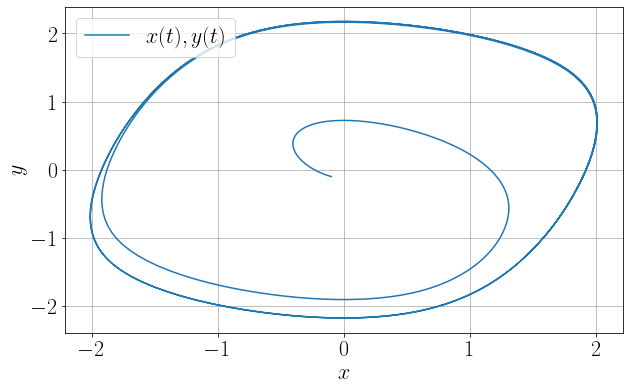

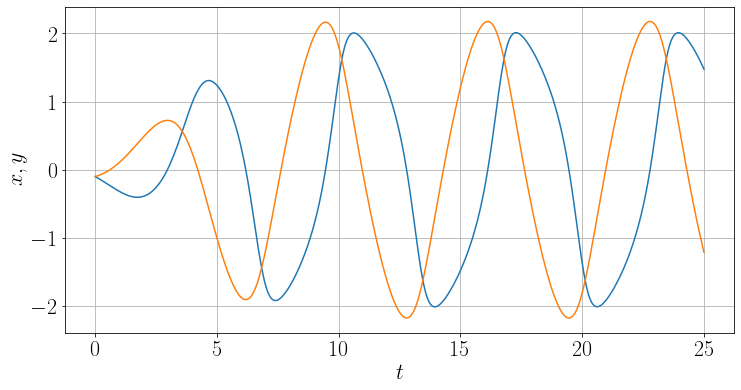

In [4]:
# The start of the phase plane

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10, 6))

plt.plot(RelOsc.y[0],RelOsc.y[1], label = r"$x(t),y(t)$")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Plot as a function of time

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 6))

plt.plot(t,RelOsc.y[0], label = r"$x(t)$")
plt.plot(t,RelOsc.y[1], label = r"$y(t)$")

plt.xlabel(r"$t$")
plt.ylabel(r"$x,y$")

plt.grid()
plt.show()

### Comparison of Forward and Backward Euler for decay equation

### Two timescales in relaxation oscillator

As practice you can try to implement your own formulae for the following decay equation: $u(t) = u_0 \exp(-\lambda t)$, with $u_0 = 100.0$ and $\lambda = 10.0$ for example. (This may bring back (happy?) memories of your MathSys interviews!)

Try implementing:
* the Forward Euler method
* the implicit Euler method
* any other improvements

Here is a sample solution for guidance:
<img src="files/images/explicitimplicitEuler.png" alt="array" style="width: 600px;"/>  

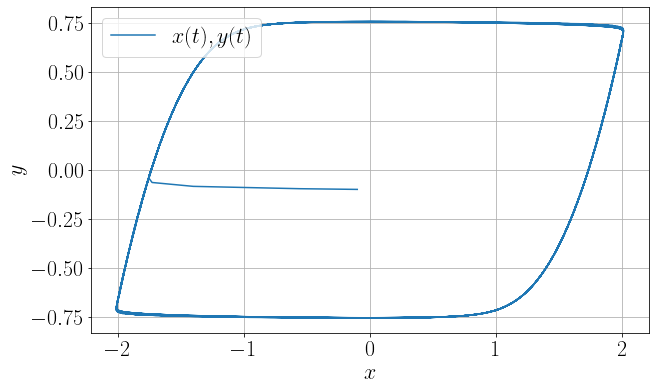

In [10]:
# Try changing mu (and run over longer timescales)
t = np.linspace(0.0,250.0,2048)
mu = 10.0

RelOsc = solve_ivp(oscillator, [0,250], y0 = y, t_eval = t)

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10, 6))

plt.plot(RelOsc.y[0],RelOsc.y[1], label = r"$x(t),y(t)$")

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend(loc="upper left")
plt.grid()
plt.show()

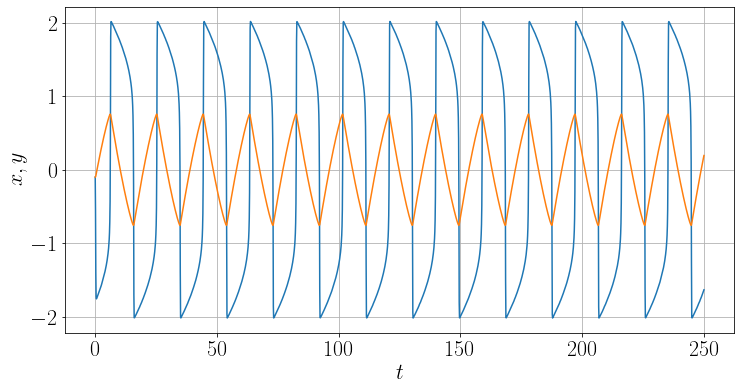

In [9]:
# Plot with new parameters as a function of time

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 6))

plt.plot(t,RelOsc.y[0], label = r"$x(t)$")
plt.plot(t,RelOsc.y[1], label = r"$y(t)$")

plt.xlabel(r"$t$")
plt.ylabel(r"$x,y$")

plt.grid()
plt.show()